# mlpro-classification-bank-churn-2025

L’objectif de ce projet est de prédire si un client va continuer à utiliser les services de la banque ou s’il va clôturer son compte (churn)

 ## Overview

 L’objectif de ce projet est de prédire si un client va continuer à utiliser les services de la banque ou s’il va clôturer son compte (churn). Pour ce faire, nous disposons d’un ensemble de données clients contenant plusieurs caractéristiques démographiques, financières et comportementales. Nous devons développer un modèle de prédiction capable de déterminer, pour chaque client, s'il va résilier ou non car cela permet aux banques de mettre en place des stratégies de rétention efficaces.

## Description

Voici les explications pour chaque variable:

- Customer ID : Un identifiant unique pour chaque client
- Surname : Le nom de famille du client
- Credit Score : Une valeur numérique représentant le score de crédit du client
- Geography : Le pays où réside le client (France, Spain ou Germany)
- Gender : Le genre du client (Male or Female)
- Age : L’âge du client
- Tenure : Le nombre d’années pendant lesquelles le client est avec la banque
- Balance : Le solde du compte du client
- NumOfProducts : Le nombre de produits bancaires utilisés par le client (par exemple, compte d’épargne, carte de crédit)
- HasCrCard : Si le client possède une carte de crédit (1 = oui, 0 = non)
- IsActiveMember : Si le client est un membre actif (1 = oui, 0 = non)
- EstimatedSalary : Le salaire estimé du client
- Exited : Si le client a résilié (1 = oui, 0 = non)

## Evaluation

Pour évaluer les résultats, nous utiliserons le score F1.

## Submission

Pour chaque ID du test set, Vous devez prédire si oui (1) ou non (0) le client va clôturer son compte à la banque. Le fichier doit contenir deux colonnes, ID et Exited, en respectant ce format:

ID,Exited
- 2,0
- 5,0
- 6,1
- etc.

# Début du projet

### Import des packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import du jeu de données d'entraînement

In [3]:
df_train = pd.read_csv("train_data.csv")
df_train

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143574,97639,15759915,Onwumelu,559,Germany,Male,45.0,3,111634.29,1,1.0,1.0,103349.74,0
143575,95939,15769974,Shih,597,Germany,Male,41.0,10,119182.73,1,0.0,0.0,121299.14,0
143576,152315,15592028,Hsiao,576,Spain,Male,31.0,6,127299.56,1,1.0,1.0,57569.89,0
143577,117952,15804009,Ch'ang,751,France,Female,27.0,4,90721.11,1,0.0,0.0,84496.78,0


### Analyse des données

Résumé :
- On constate qu'il n'y a pas un énorme déséquilibre entre le nombres d'hommes et de femmes dans ce dataset
80966 hommes pour 62613 femmes.
- Les clients ayant entre 1 et 9 ans d’ancienneté sont majoritaires, avec des effectifs assez équilibrés.
- Les clients ayant moins d’un an (Tenure == 0) ou plus de 9 ans (Tenure == 10) sont sous-représentés.<br>
- La médiane de la répartition de l'ancienneté est centré à 5 ans, 50% des clients ont entre 3 et 7 ans d'ancienneté
Durée de vie de la banque ?
- Si la banque n’a que 10 ans, alors c’est normal de ne pas avoir plus d’ancienneté.
- Pareil pour Tenure == 0 : si on collecte les données en cours d’année, certains clients ne sont pas encore à 1 an
- La majorité des clients souscrivent à 1 ou 2 produits et très peu à plus de 2 produits.
- La majorité des clients se situe en France, l'allemagne et l'espagne ont un nombre équivalent de clients.
- La majorité des clients possèdent une carte de crédit. 
- Le nombre de clients actif et non actif sont réparti de manière égale





Questions :
- Est-ce que les hommes ont plus tendances à quitter la banque que les femmes ?
- Les nouveaux clients (Tenure = 0) quittent-ils plus facilement la banque ?
- Les clients très anciens (Tenure = 10) ont-ils aussi tendance à partir ?
- Quelles sont les clients les plus à risque de quitter la banques, ceux avec 1, 2, 3 ou 4 produits ?
- Dans quelle région les clients ont tendances à le plus partir ?
- Les clients possédant une carte de crédit ont ils plus tendances à partir que ceux n'en possédant pas ?
- Les clients inactifs ont-ils plus tendances à partir ?
- Environ 25% des clients ont résilié. 

1) Détection des variables discrètes et continu
2) Analyse univarié
3) Analyse multivarié
4) Faire des hypothèses et les testées

- Variables discrètes : Gender, Tenure, NumOfProducts, Geography, HasCrCard, IsActiveMember, Exited
- Variables continues : CreditScore, Balance, EstimatedSalary, Age

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143579 entries, 0 to 143578
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               143579 non-null  int64  
 1   CustomerId       143579 non-null  int64  
 2   Surname          143579 non-null  object 
 3   CreditScore      143579 non-null  int64  
 4   Geography        143579 non-null  object 
 5   Gender           143579 non-null  object 
 6   Age              143579 non-null  float64
 7   Tenure           143579 non-null  int64  
 8   Balance          143579 non-null  float64
 9   NumOfProducts    143579 non-null  int64  
 10  HasCrCard        143579 non-null  float64
 11  IsActiveMember   143579 non-null  float64
 12  EstimatedSalary  143579 non-null  float64
 13  Exited           143579 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 15.3+ MB


In [41]:
df_train.nunique().sort_values()


Gender                  2
Exited                  2
HasCrCard               2
IsActiveMember          2
Geography               3
NumOfProducts           4
Tenure                 11
Age                    71
CreditScore           456
Surname              2765
CustomerId          22017
Balance             27258
EstimatedSalary     50076
ID                 143579
dtype: int64

### Analyse Univariée

Des variables discrètes (value.count() et plot(kind="bar"))

## Analyse de la variable "Gender"

- Il n'y a pas un énorme déséquilibre entre le nombres d'hommes et de femmes dans ce dataset
80966 hommes pour 62613 femmes.

Text(0.5, 0.98, 'Répartition des hommes et des femmes ce jeu de donnée')

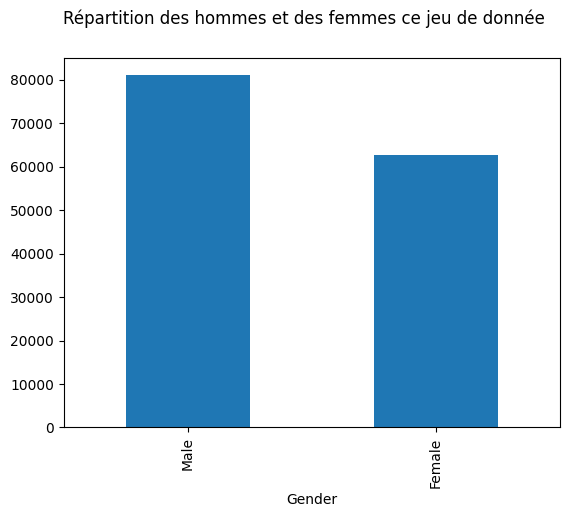

In [42]:
df_train["Gender"].value_counts().plot(kind="bar")
df_train["Gender"].value_counts()
plt.suptitle("Répartition des hommes et des femmes ce jeu de donnée")

## Analyse de la variable Tenure

- Le nombre de clients entre 1 et 9 compris sont répartits de manières assez similaire. 
- Il y a beacoup moins de client avec moins de 1 an d'ancienneté et aussi de plus de 9 ans d'ancienneté. 
- La moyenne est de 5 ans
- Avec un écart type de 2.8 ans
- 50% des clients ont une ancienneté compris entre 3 et 7 ans.


Tenure
2     15766
7     15474
8     15272
4     15257
5     14984
1     14603
9     14557
3     14484
6     13716
10     5120
0      4346
Name: count, dtype: int64

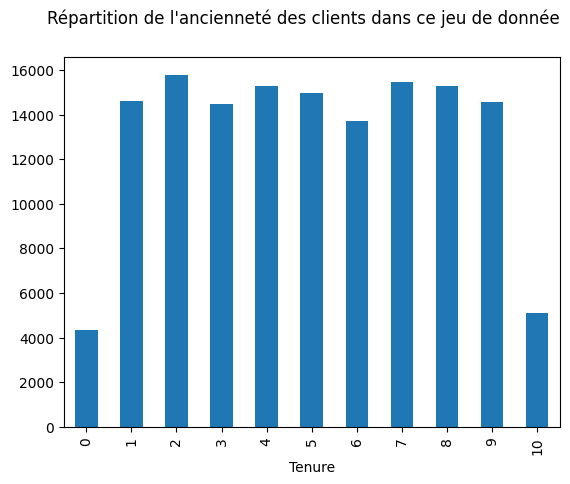

In [43]:
df_train["Tenure"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition de l'ancienneté des clients dans ce jeu de donnée")
df_train["Tenure"].value_counts()

In [9]:
df_train["Tenure"].describe()

count    143579.000000
mean          5.018408
std           2.807027
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          10.000000
Name: Tenure, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable Tenure dans ce jeu de donnée')

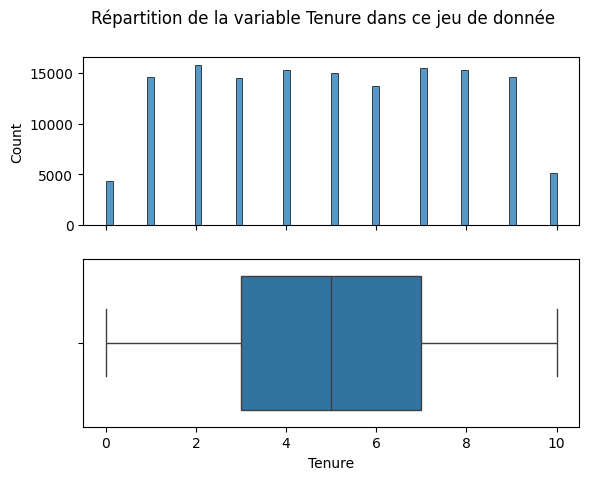

In [44]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=df_train, x="Tenure", ax=ax[0])
sns.boxplot(data=df_train, x="Tenure", ax=ax[1])
plt.suptitle("Répartition de la variable Tenure dans ce jeu de donnée")

## Analyse de la variable "NumOfProducts"

- La majorité des clients souscrivent à 1 ou 2 produits et très peu à plus de 2 produits.
- Quelles sont les clients les plus à risque de quitter la banques, ceux avec 1, 2, 3 ou 4 produits ?

NumOfProducts
2    73301
1    67364
3     2510
4      404
Name: count, dtype: int64

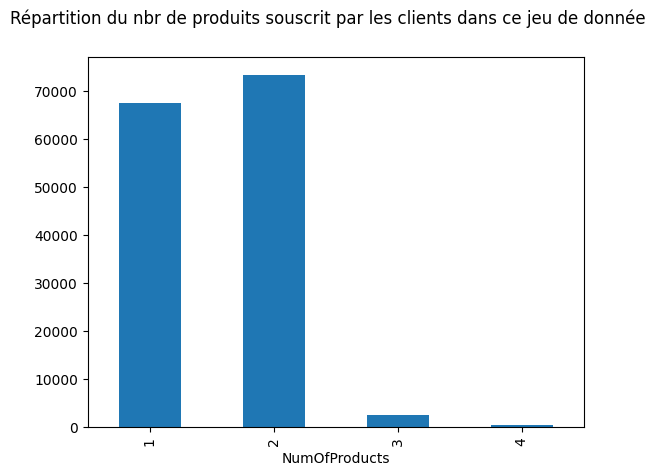

In [45]:
df_train["NumOfProducts"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition du nbr de produits souscrit par les clients dans ce jeu de donnée")
df_train["NumOfProducts"].value_counts()

## Analyse de la variable "Geography"

- La majorité des clients se situe en France, l'allemagne et l'espagne ont un nombre équivalent de clients.
- Dans quelle région les clients ont tendances à le plus partir ?

Geography
France     81886
Spain      31588
Germany    30105
Name: count, dtype: int64

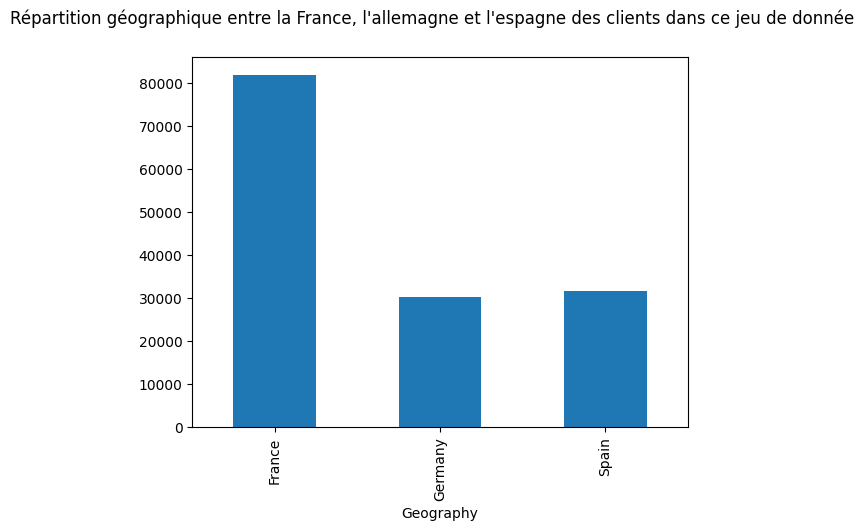

In [47]:
df_train["Geography"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition géographique entre la France, l'allemagne et l'espagne des clients dans ce jeu de donnée")
df_train["Geography"].value_counts()

## Analyse de la variable "HasCrCard"

- La majorité des clients possèdent une carte de crédit.
- 108274 clients ont une carte de crédit
- 35305 clients n'ont pas de carte de crédit

HasCrCard
1.0    108274
0.0     35305
Name: count, dtype: int64

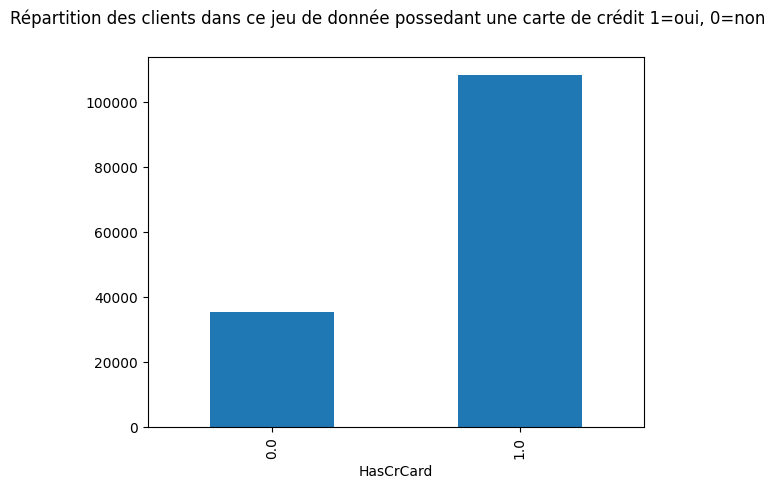

In [48]:
df_train["HasCrCard"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition des clients dans ce jeu de donnée possedant une carte de crédit 1=oui, 0=non")
df_train["HasCrCard"].value_counts()

## Analyse de la variable "IsActiveMember"

- Le nombre de clients actif et non actif sont réparti de manière égale<br>
- Les clients inactifs ont-ils plus tendances à partir ?

IsActiveMember
0.0    72249
1.0    71330
Name: count, dtype: int64

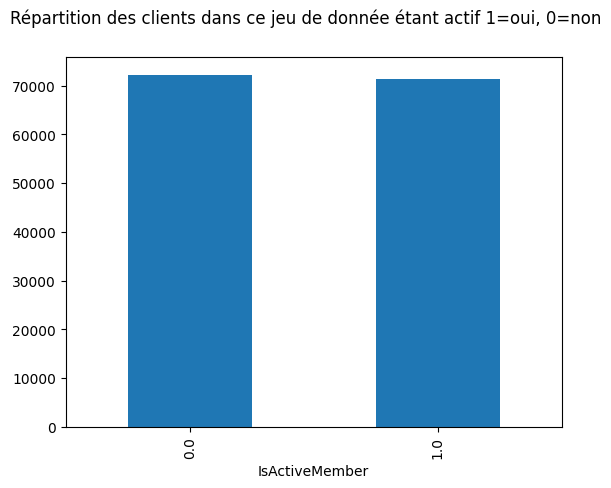

In [ ]:
df_train["IsActiveMember"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition des clients dans ce jeu de donnée étant actif 1=oui, 0=non")
df_train["IsActiveMember"].value_counts()

## Analyse de la variable "Exited"

- 113129 clients sont actifs
- 30450 clients ont résiliés

Exited
0    113129
1     30450
Name: count, dtype: int64

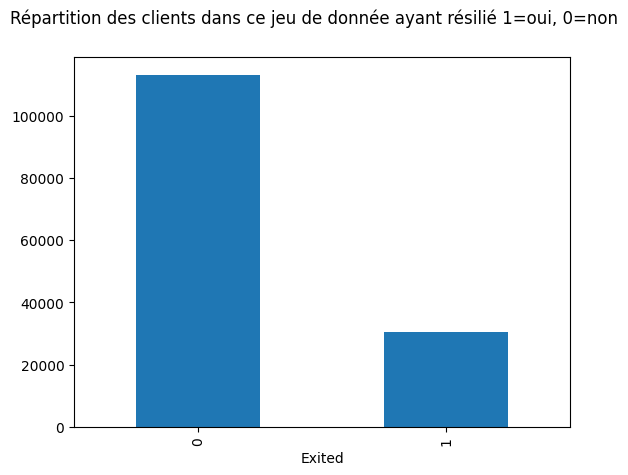

In [5]:
df_train["Exited"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition des clients dans ce jeu de donnée ayant résilié 1=oui, 0=non")
df_train["Exited"].value_counts()


Analyse de variables continues<br>

avec describe et histo + boxplot

## Analyse de la variable "CreditScore"

- La moyenne du score de crédit en France, Allemagne et Espagne est de 656 sur les 10 dernières année
- Avec un écart type de 80.21
- Une médiane de 659
- Un minimum de 350 et un maximum de 850

In [6]:
df_train["CreditScore"].describe()

count    143579.000000
mean        656.411704
std          80.210361
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable CreditScore dans ce jeu de donnée')

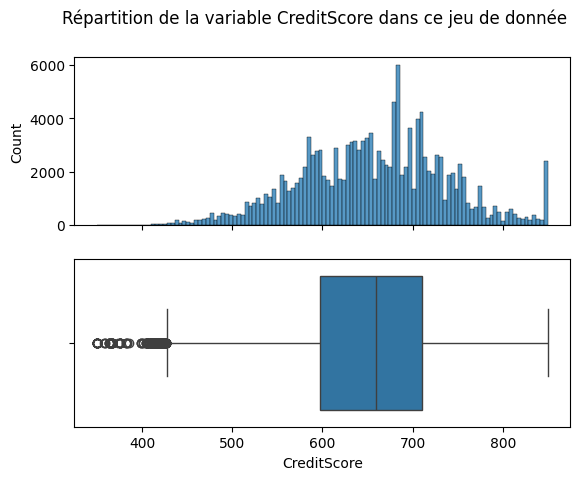

In [7]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=df_train, x="CreditScore", ax=ax[0])
sns.boxplot(data=df_train, x="CreditScore", ax=ax[1])
plt.suptitle("Répartition de la variable CreditScore dans ce jeu de donnée")

## Analyse de la variable "Balance"

- La moyenne du solde des clients est de 55533€
- L'écart type est de 62822€
- La médiane est de 0€
- Un mini de 0€ et un maxi de 250898€
- Seulement 25% des clients possède un solde positif supérieur à 0€

In [10]:
df_train["Balance"].describe()

count    143579.000000
mean      55533.640642
std       62822.616346
min           0.000000
25%           0.000000
50%           0.000000
75%      119948.090000
max      250898.090000
Name: Balance, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable Balance dans ce jeu de donnée')

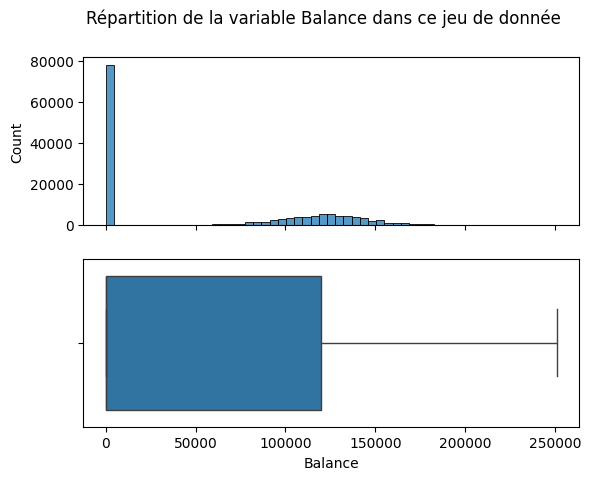

In [11]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=df_train, x="Balance", ax=ax[0])
sns.boxplot(data=df_train, x="Balance", ax=ax[1])
plt.suptitle("Répartition de la variable Balance dans ce jeu de donnée")

## Analyse de la variable "EstimatedSalary"

- Le salaire moyen des clients est de 112530€ (€?, Annuel, mensuel ?)
- l'écart type est de 50301€
- La médiane est de 117931€

In [16]:
df_train["EstimatedSalary"].describe()

count    143579.000000
mean     112530.072465
std       50301.718378
min          11.580000
25%       74580.800000
50%      117931.100000
75%      155149.685000
max      199992.480000
Name: EstimatedSalary, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable EstimatedSalary dans ce jeu de donnée')

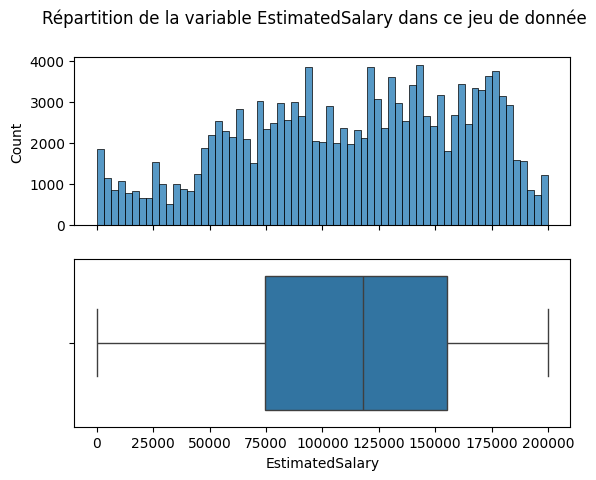

In [17]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=df_train, x="EstimatedSalary", ax=ax[0])
sns.boxplot(data=df_train, x="EstimatedSalary", ax=ax[1])
plt.suptitle("Répartition de la variable EstimatedSalary dans ce jeu de donnée")

## Analyse de la variable "Age"

- La moyenne d'age des clients est de 38 ans
- L'écart type est de 8.87 ans
- La médiane est de 37 ans
- Les clients ont entre 18 et 92 ans
- 50% des clients ont entre 32 et 42 ans

In [14]:
df_train["Age"].describe()

count    143579.000000
mean         38.144476
std           8.871711
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable Age dans ce jeu de donnée')

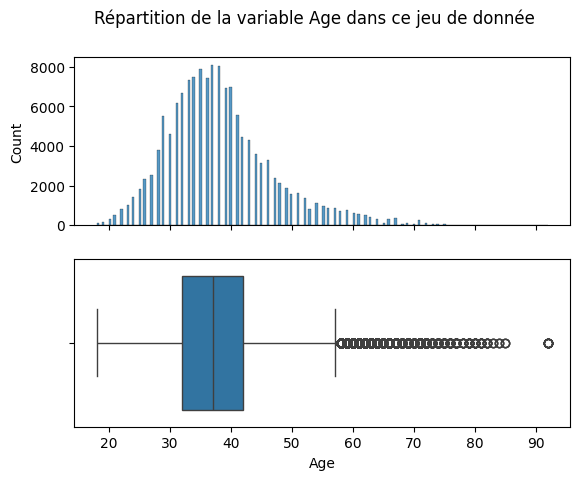

In [15]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=df_train, x="Age", ax=ax[0])
sns.boxplot(data=df_train, x="Age", ax=ax[1])
plt.suptitle("Répartition de la variable Age dans ce jeu de donnée")

# Analyse Multivariée

discrète - discrète

## Analyse de la variable "Gender" avec "Exited"

- Les femmes ont plus tendance à partir que les hommes.

In [39]:
pd.crosstab(df_train["Exited"], df_train["Gender"])

Gender,Female,Male
Exited,,
0,45038,68091
1,17575,12875


<Axes: xlabel='Exited'>

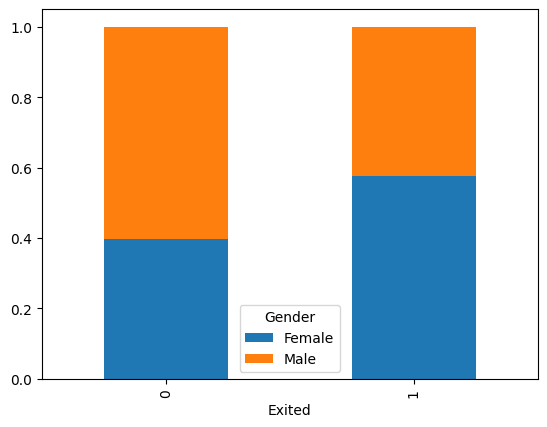

In [38]:
pd.crosstab(df_train["Exited"], df_train["Gender"], normalize="index").plot(kind="bar", stacked=True)

## Analyse de la variable "Tenure" avec "Exited"

In [30]:
pd.crosstab(df_train["Exited"], df_train["Tenure"], normalize=True)

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,0.022524,0.078570,0.088397,0.077804,0.082094,0.081384,0.076683,0.087478,0.085117,0.079858,0.028012
1,0.007745,0.023137,0.021410,0.023074,0.024168,0.022977,0.018847,0.020295,0.021250,0.021528,0.007647


<Axes: xlabel='Exited'>

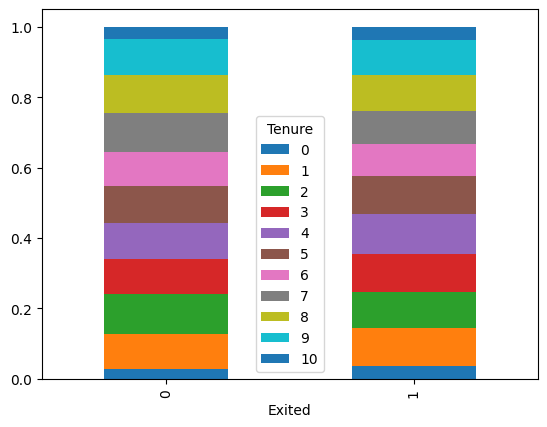

In [40]:
pd.crosstab(df_train["Exited"], df_train["Tenure"], normalize="index").plot(kind="bar", stacked=True)

## Analyse de la variable "NumOfProducts" avec "Exited"

In [35]:
pd.crosstab(df_train["Exited"], df_train["NumOfProducts"])

NumOfProducts,1,2,3,4
Exited,,,,
0,43905,68879,292,53
1,23459,4422,2218,351


<Axes: xlabel='Exited'>

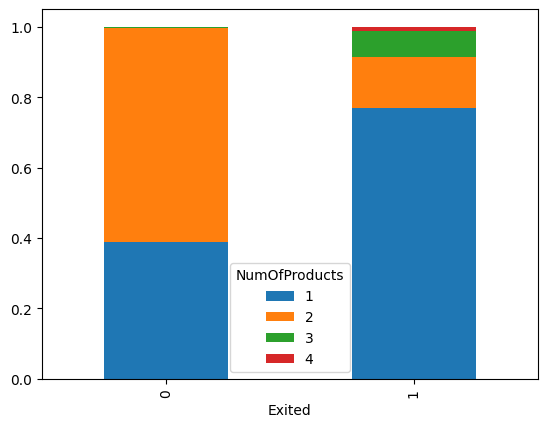

In [37]:
pd.crosstab(df_train["Exited"], df_train["NumOfProducts"], normalize="index").plot(kind="bar", stacked=True)

## Analyse de la variable "Geography" avec "Exited"

In [32]:
pd.crosstab(df_train["Exited"], df_train["Geography"], normalize=True)

Geography,France,Germany,Spain
Exited,,,
0,0.475961,0.129942,0.182018
1,0.094359,0.079733,0.037986


<Axes: xlabel='Exited'>

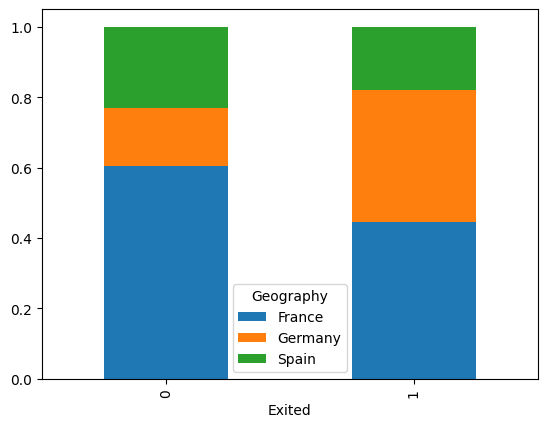

In [43]:
pd.crosstab(df_train["Exited"], df_train["Geography"], normalize="index").plot(kind="bar", stacked=True)

## Analyse de la variable "HasCrCard" avec "Exited"

In [44]:
pd.crosstab(df_train["Exited"], df_train["HasCrCard"])

HasCrCard,0.0,1.0
Exited,,
0,27246,85883
1,8059,22391


<Axes: xlabel='Exited'>

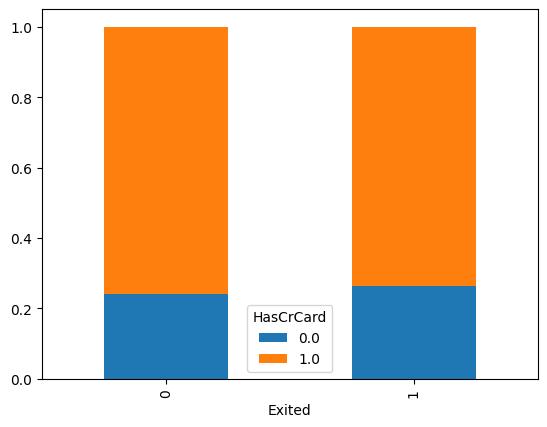

In [45]:
pd.crosstab(df_train["Exited"], df_train["HasCrCard"], normalize="index").plot(kind="bar", stacked=True)

## Analyse de la variable "IsActiveMember" avec "Exited"

In [23]:
pd.crosstab(df_train["Exited"], df_train["IsActiveMember"])

IsActiveMember,0.0,1.0
Exited,,
0,50742,62387
1,21507,8943


<Axes: xlabel='Exited'>

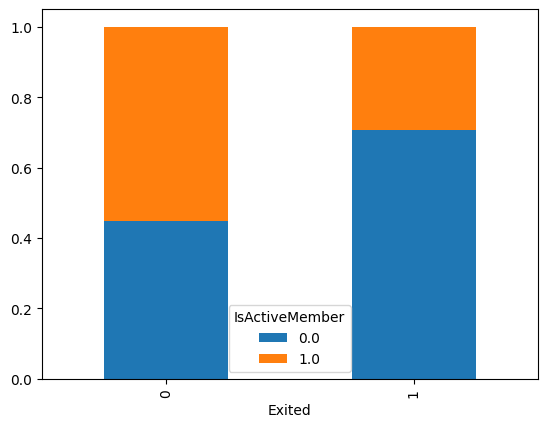

In [48]:
pd.crosstab(df_train["Exited"], df_train["IsActiveMember"], normalize="index").plot(kind="bar", stacked=True)

continue - discrète

## Analyse de la variable "CreditScore" avec "Exited"

## Analyse de la variable "Balance" avec "Exited"

## Analyse de la variable "EstimatedSalary" avec "Exited"

## Analyse de la variable "Age" avec "Exited"